In [1]:

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier 

In [3]:
def evaluate_model(dt_classifier):
    
    print("Train Accuracy :", accuracy_score(train_Y, dt_classifier.predict(train_X)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(train_Y, dt_classifier.predict(train_X)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(test_Y, dt_classifier.predict(test_X)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(test_Y, dt_classifier.predict(test_X)))

# Six Buckets

In [4]:
testData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test.csv')
trainData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train.csv')
validData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/val.csv')
train_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_6_buckets.csv')
test_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_6_buckets.csv')
val_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_6_buckets.csv')
testData['data_IMDBscore']=test_data_target['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target['data_IMDBscore']
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']

In [5]:
dt = DecisionTreeClassifier(random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [8]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [9]:

grid_search.fit(train_X, train_Y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [10]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.060979,0.077601,0.090611,0.007989,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.592078,0.597324,0.600472,0.601679,0.597888,0.003712,27
1,1.228568,0.257342,0.217987,0.127247,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.592078,0.597324,0.600472,0.601679,0.597888,0.003712,27
2,1.266617,0.269653,0.097012,0.017057,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.592078,0.597324,0.600472,0.601679,0.597888,0.003712,27
3,0.943963,0.011188,0.096877,0.008752,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.592078,0.597324,0.600472,0.601679,0.597888,0.003712,27
4,0.964017,0.014337,0.093020,0.007273,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.592078,0.597324,0.600472,0.601679,0.597888,0.003712,27


In [11]:
score_df.nlargest(5,"mean_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
49,3.678721,0.073888,0.090422,0.020643,entropy,20,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.626967,0.636936,0.635887,0.650748,0.637634,0.008504,1
44,3.502566,0.049040,0.097444,0.004872,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.626967,0.635362,0.636149,0.648911,0.636847,0.007840,2
24,3.429864,0.060106,0.100424,0.004684,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.635887,0.636149,0.635100,0.631068,0.634551,0.002048,3
19,3.130187,0.047894,0.095480,0.010851,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.633263,0.636149,0.636674,0.629494,0.633895,0.002854,4
42,4.255756,0.078906,0.102523,0.005383,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.630902,0.620934,0.645855,0.636841,0.633633,0.009061,5


In [12]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=100,
                       random_state=42)

In [13]:
dt_best = grid_search.best_estimator_

In [14]:
evaluate_model(dt_best)

Train Accuracy : 0.6599331015937562
Train Confusion Matrix:
[[   0   31   85    5    0]
 [   0  210 1029   50    0]
 [   0  158 6619 1487    0]
 [   0    8 2319 3233    0]
 [   0    0    1   12    0]]
--------------------------------------------------
Test Accuracy : 0.6493268053855569
Test Confusion Matrix:
[[   0    9   10    2    0]
 [   0   30  250   17    0]
 [   0   26 1423  338    0]
 [   0    2  490  669    0]
 [   0    0    0    2    0]]


[Text(1085.54562590843, 1050.96, 'horror <= 0.5\nentropy = 1.375\nsamples = 15247\nvalue = [121, 1289, 8264, 5560, 13]'),
 Text(849.085437863372, 978.48, 'data_runtime <= 0.498\nentropy = 1.313\nsamples = 13408\nvalue = [84, 810, 7141, 5360, 13]'),
 Text(626.9136082848837, 906.0, 'documentary <= 0.5\nentropy = 1.324\nsamples = 10565\nvalue = [81, 769, 6026, 3686, 3]'),
 Text(394.117914244186, 833.52, 'drama <= 0.5\nentropy = 1.319\nsamples = 9999\nvalue = [81, 767, 5897, 3252, 2]'),
 Text(153.5919331395349, 761.04, 'data_year <= -0.944\nentropy = 1.382\nsamples = 4540\nvalue = [62, 561, 2812, 1105, 0]'),
 Text(54.06976744186046, 688.56, 'data_runtime <= -0.322\nentropy = 1.142\nsamples = 1001\nvalue = [3, 23, 567, 408, 0]'),
 Text(32.44186046511628, 616.08, 'western <= 0.5\nentropy = 1.184\nsamples = 643\nvalue = [3, 23, 383, 234, 0]'),
 Text(21.627906976744185, 543.6, 'comedy <= 0.5\nentropy = 1.217\nsamples = 522\nvalue = [2, 20, 282, 218, 0]'),
 Text(10.813953488372093, 471.12, 'ent

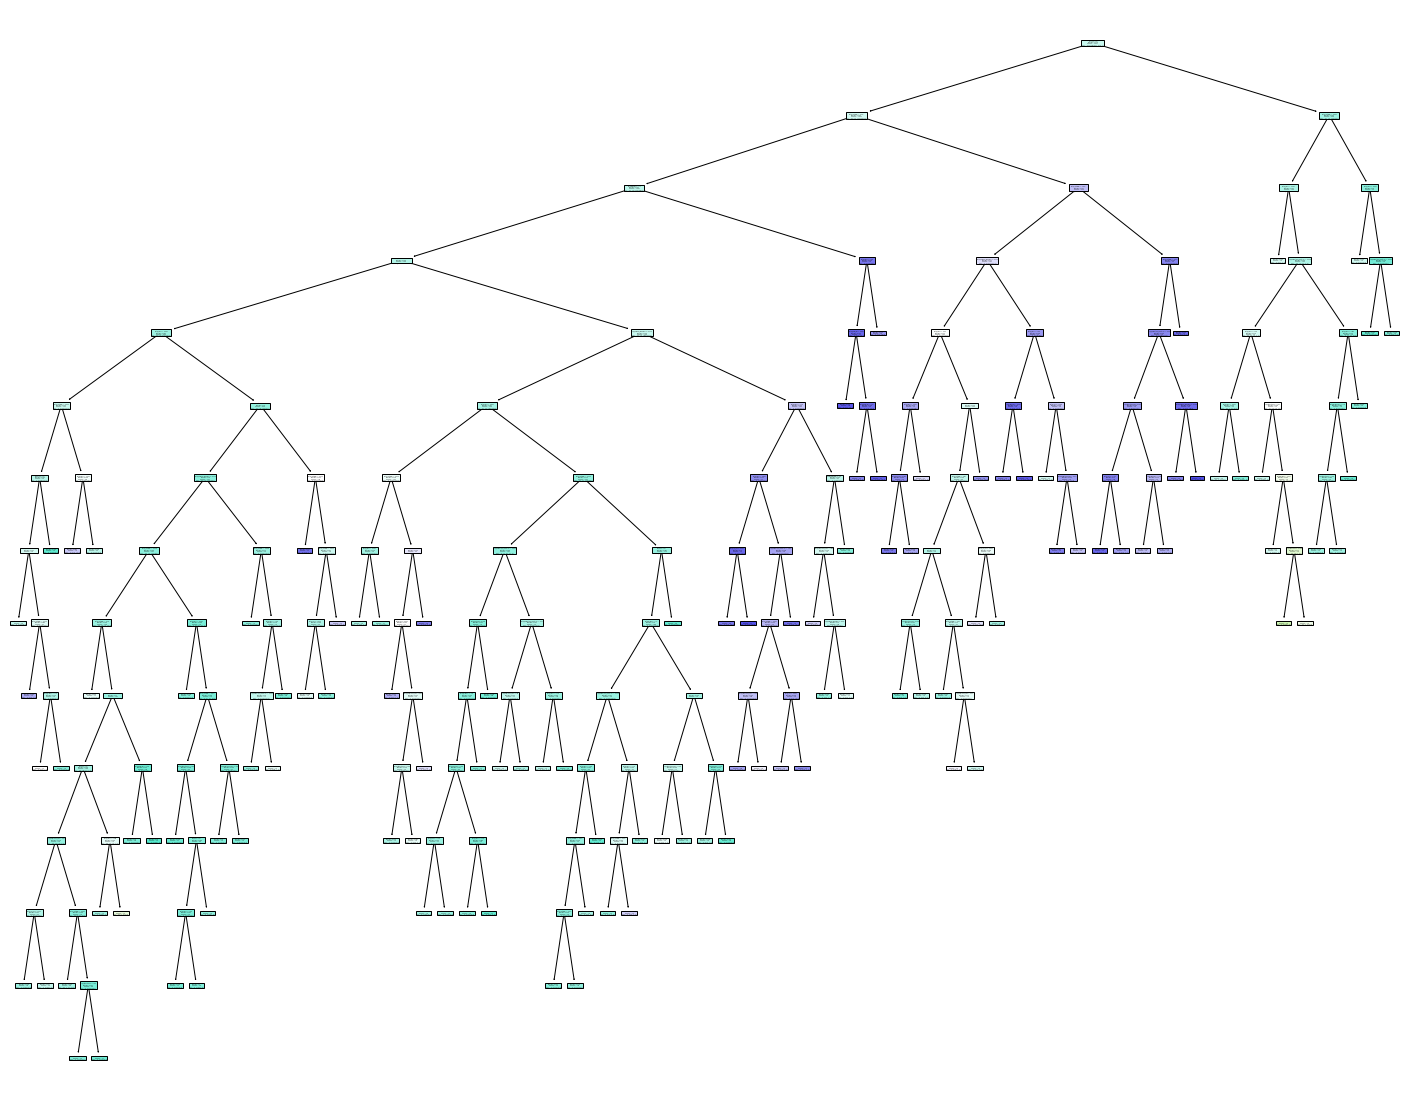

In [16]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_best ,feature_names=train_X.columns,filled=True)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, dt_best.predict(test_X)))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        21
           4       0.45      0.10      0.16       297
           6       0.65      0.80      0.72      1787
           8       0.65      0.58      0.61      1161
          10       0.00      0.00      0.00         2

    accuracy                           0.65      3268
   macro avg       0.35      0.29      0.30      3268
weighted avg       0.63      0.65      0.63      3268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Eleven Buckets

In [18]:
testData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test.csv')
trainData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train.csv')
validData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/val.csv')
train_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_11_buckets.csv')
test_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_11_buckets.csv')
val_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_11_buckets.csv')
testData['data_IMDBscore']=test_data_target['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target['data_IMDBscore']
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']

In [19]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=train_X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [20]:
dt = DecisionTreeClassifier(random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [23]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [24]:
grid_search.fit(train_X, train_Y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [25]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.041384,0.007851,0.104318,0.009425,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.420252,0.417629,0.40766,0.417476,0.415754,0.004802,40
1,0.978935,0.020195,0.094378,0.009509,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.420252,0.417629,0.40766,0.417476,0.415754,0.004802,40
2,0.984005,0.012714,0.093698,0.007110,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.420252,0.417629,0.40766,0.417476,0.415754,0.004802,40
3,0.990062,0.012106,0.094477,0.006923,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.420252,0.417629,0.40766,0.417476,0.415754,0.004802,40
4,0.971697,0.011447,0.094709,0.010414,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.420252,0.417629,0.40766,0.417476,0.415754,0.004802,40


In [26]:
score_df.nlargest(5,"mean_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
44,3.665875,0.042252,0.092251,0.001986,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.451994,0.447272,0.446485,0.459722,0.451368,0.005263,1
49,3.971489,0.048034,0.086362,0.018855,entropy,20,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.451207,0.450944,0.444386,0.454211,0.450187,0.003587,2
19,3.250871,0.017086,0.093065,0.001499,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.447272,0.447009,0.447009,0.454474,0.448941,0.003196,3
24,3.543505,0.055211,0.100493,0.009481,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.447534,0.450944,0.442288,0.453162,0.448482,0.004100,4
43,4.041819,0.015770,0.102879,0.014030,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.443599,0.439402,0.445173,0.451325,0.444875,0.004280,5


In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       random_state=42)

In [28]:
dt_best = grid_search.best_estimator_

In [29]:
evaluate_model(dt_best)

Train Accuracy : 0.47019085721781334
Train Confusion Matrix:
[[   0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    7   42    5    1    0    0]
 [   0    0    0    0   52  114   30    1    0    0]
 [   0    0    0    0  125  325   73    4    0    0]
 [   0    0    0    0  217 1016  394   22    0    0]
 [   0    0    0    0  174 2131 1836   93    0    0]
 [   0    0    0    0   38 1343 4240  414    0    0]
 [   0    0    0    0    0  229 1619  581    0    0]
 [   0    0    0    0    0    9   49   61    0    0]
 [   0    0    0    0    0    0    0    1    0    0]]
--------------------------------------------------
Test Accuracy : 0.45930232558139533
Test Confusion Matrix:
[[  0   0   0   1   3   0   2   0   0]
 [  0   0   0  12  28   4   1   0   0]
 [  0   0   0  25  89  13   4   0   0]
 [  0   0   0  38 208  93   6   0   0]
 [  0   0   0  37 460 412  21   0   0]
 [  0   0   0   9 296 873  83   0   0]
 [  0   0   0   0  58 345 130   0   0]
 [  0   0   0   0   0   8

[Text(1033.0855507425742, 1037.7818181818182, 'horror <= 0.5\nentropy = 2.146\nsamples = 15247\nvalue = [1, 55, 197, 527, 1649, 4234, 6035, 2429, 119, 1]'),
 Text(755.7688737623763, 938.9454545454546, 'data_runtime <= 0.605\nentropy = 2.055\nsamples = 13408\nvalue = [1, 39, 111, 322, 1184, 3585, 5695, 2355, 115, 1]'),
 Text(442.8434405940594, 840.1090909090909, 'data_year <= -0.863\nentropy = 2.059\nsamples = 11018\nvalue = [1, 38, 109, 309, 1116, 3226, 4577, 1590, 52, 0]'),
 Text(186.46039603960398, 741.2727272727273, 'data_original_language <= -0.274\nentropy = 1.701\nsamples = 2546\nvalue = [0, 1, 13, 19, 75, 544, 1360, 526, 8, 0]'),
 Text(110.4950495049505, 642.4363636363637, 'data_runtime <= -0.643\nentropy = 1.671\nsamples = 2140\nvalue = [0, 1, 12, 17, 69, 508, 1188, 339, 6, 0]'),
 Text(41.43564356435644, 543.6, 'data_year <= -1.469\nentropy = 1.85\nsamples = 731\nvalue = [0, 0, 12, 16, 42, 201, 369, 90, 1, 0]'),
 Text(27.623762376237625, 444.76363636363635, 'data_runtime <= -1.

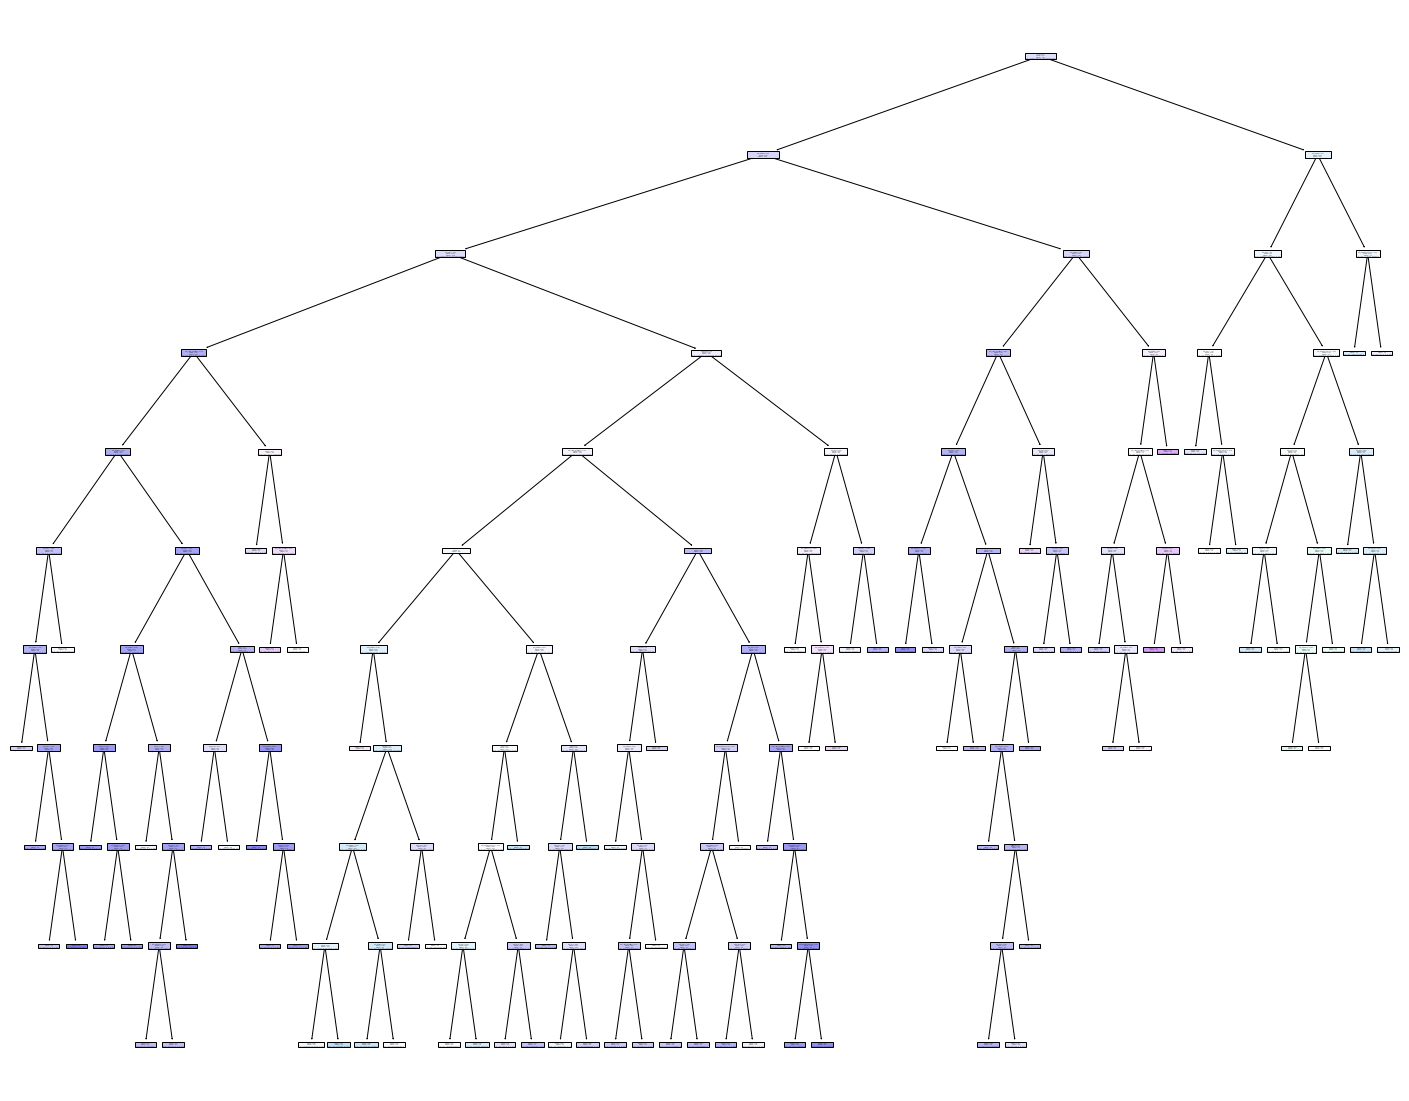

In [30]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_best ,feature_names=train_X.columns,filled=True)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, dt_best.predict(test_X)))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00       131
           5       0.31      0.11      0.16       345
           6       0.40      0.49      0.44       930
           7       0.50      0.69      0.58      1261
           8       0.51      0.24      0.33       533
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         1

    accuracy                           0.46      3268
   macro avg       0.19      0.17      0.17      3268
weighted avg       0.42      0.46      0.42      3268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# TwentyOne Buckets

In [40]:
testData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test.csv')
trainData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train.csv')
validData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/val.csv')
train_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_21_buckets.csv')
test_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_21_buckets.csv')
val_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_21_buckets.csv')
testData['data_IMDBscore']=test_data_target['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target['data_IMDBscore']
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']*2
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']*2

In [41]:
dt = DecisionTreeClassifier(random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [44]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [45]:

grid_search.fit(train_X, train_Y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [46]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.006751,0.015910,0.096117,0.010304,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21511,0.219045,0.206978,0.21228,0.213353,0.004395,45
1,0.962713,0.011036,0.096457,0.010245,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21511,0.219045,0.206978,0.21228,0.213353,0.004395,45
2,0.957726,0.012453,0.098929,0.013662,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21511,0.219045,0.206978,0.21228,0.213353,0.004395,45
3,0.952789,0.012384,0.105153,0.009820,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21511,0.219045,0.206978,0.21228,0.213353,0.004395,45
4,0.945577,0.008153,0.094219,0.008983,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21511,0.219045,0.206978,0.21228,0.213353,0.004395,45


In [47]:
score_df.nlargest(5,"mean_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,3.909487,0.050917,0.091573,0.005306,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.258395,0.242655,0.254460,0.250853,0.251590,0.005808,1
10,2.019531,0.018990,0.098885,0.005692,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.242917,0.253935,0.250787,0.246130,0.248442,0.004229,2
11,2.006356,0.014108,0.096003,0.011077,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.239244,0.254197,0.248688,0.246392,0.247131,0.005364,3
14,1.959726,0.017459,0.095073,0.007370,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.241605,0.243442,0.254460,0.247442,0.246737,0.004933,4
12,1.959590,0.006652,0.101366,0.010708,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.238195,0.252361,0.249738,0.245867,0.246540,0.005343,5


In [48]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [49]:
dt_best = grid_search.best_estimator_

In [50]:
evaluate_model(dt_best)

Train Accuracy : 0.34013248507903193
Train Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    4    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    2    2   21    5    2    1    1
     0    0    0]
 [   0    0    0    0    0    0    5    6    1   34    4    4    0    1
     0    0    0]
 [   0    0    0    1    0    0   12   12    4   47   14    7    0    1
     0    0    0]
 [   0    0    0    1    2    1   13   24   11   84   15    9    2    0
     0    0    0]
 [   0    0    0    1    0    3   11   51   10  124   49   17    5    1
     0    0    0]
 [   0    0    0    0    0    1   29   55   29  221  102   40   11    2
     0    0    0]
 [   0    0    0    1    0    1    5  116   33  364  205   89   22    4
     0    0    0]
 [   0    0    0    1    1    1    8   60  187  487  432  173   49    9
     0    0    0]
 [   0    0    0    1    1    0    4   44   60  750  727  448  126   17
     0    0    0]
 [   0    0    0    0    0    0    3   

[Text(924.451632437227, 1037.7818181818182, 'horror <= 0.5\ngini = 0.859\nsamples = 15247\nvalue = [4, 34, 55, 98, 162, 272, 490, 840, 1408, 2178\n2973, 3103, 2299, 1059, 239, 31, 2]'),
 Text(592.5846922762008, 938.9454545454546, 'data_original_language <= -0.274\ngini = 0.849\nsamples = 13408\nvalue = [4, 27, 34, 57, 84, 162, 325, 606, 1097, 1856, 2698\n2947, 2213, 1031, 235, 30, 2]'),
 Text(311.5335016375546, 840.1090909090909, 'data_year <= -0.944\ngini = 0.85\nsamples = 10102\nvalue = [4, 27, 28, 47, 75, 144, 292, 522, 956, 1561, 2155\n2138, 1403, 603, 124, 21, 2]'),
 Text(113.26760371179039, 741.2727272727273, 'data_runtime <= -0.251\ngini = 0.79\nsamples = 2334\nvalue = [0, 1, 1, 7, 6, 11, 8, 28, 71, 268, 549, 742\n417, 198, 27, 0, 0]'),
 Text(62.05922489082969, 642.4363636363637, 'walt disney productions <= 0.5\ngini = 0.789\nsamples = 1250\nvalue = [0, 1, 1, 7, 6, 11, 7, 21, 51, 189, 331, 387\n166, 64, 8, 0, 0]'),
 Text(44.92631004366812, 543.6, 'title-charlie <= 0.5\ngini = 0.

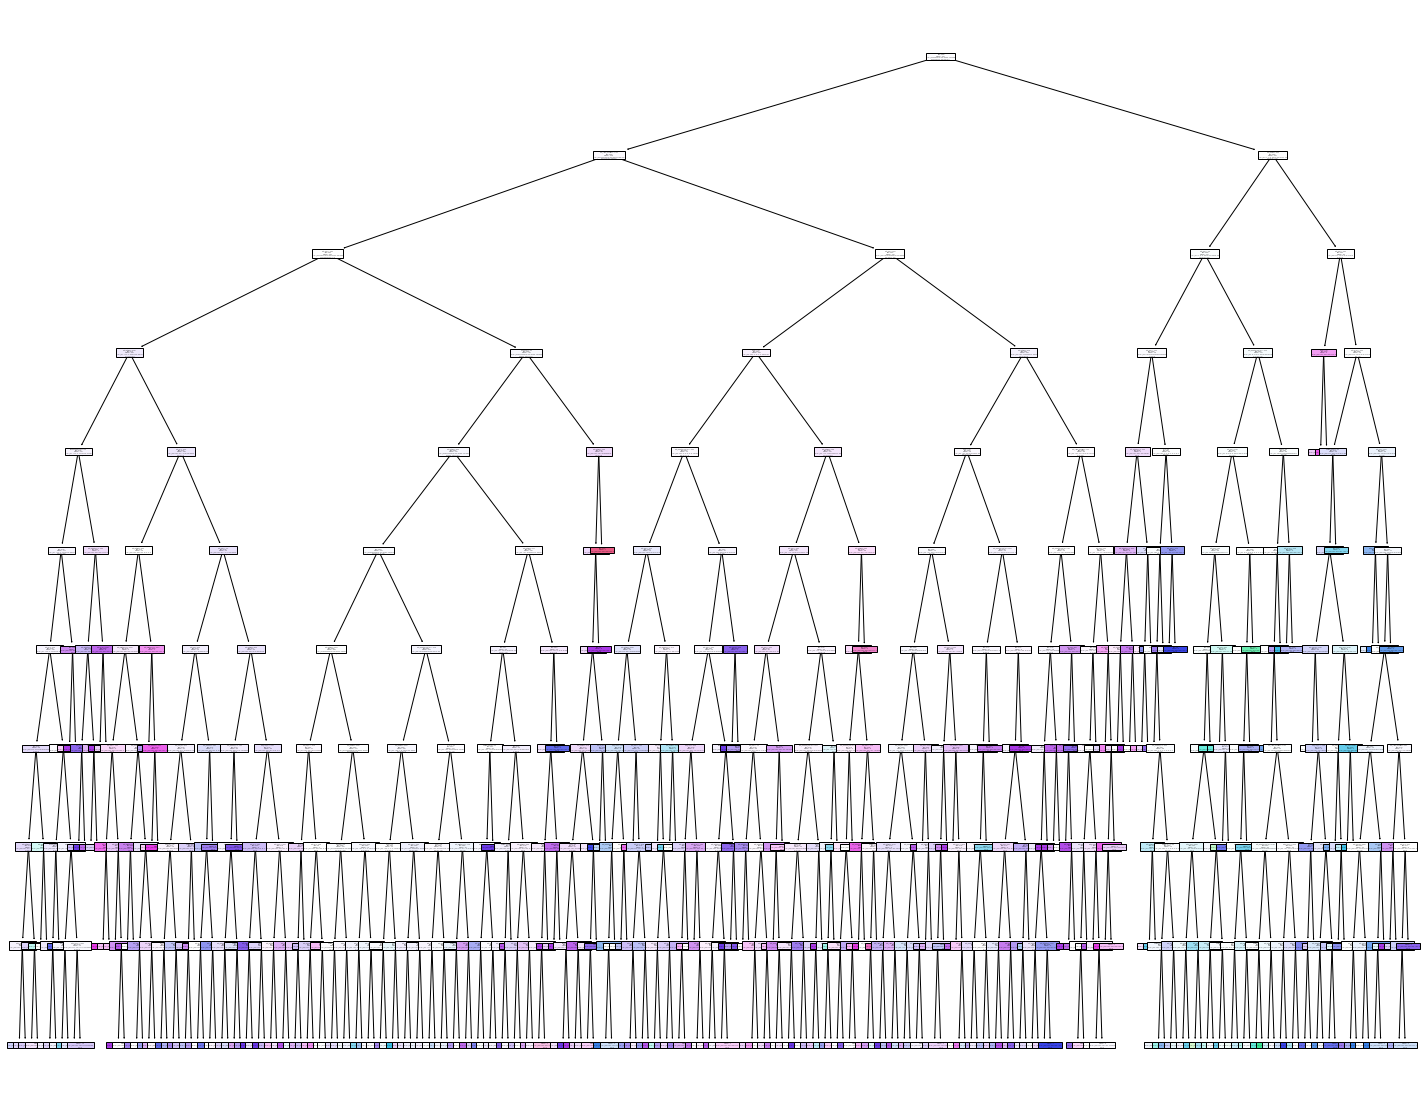

In [51]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_best ,feature_names=train_X.columns,filled=True)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, dt_best.predict(test_X)))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00        21
         7.0       0.00      0.00      0.00        45
         8.0       0.17      0.02      0.03        60
         9.0       0.21      0.03      0.05       109
        10.0       0.15      0.07      0.09       177
        11.0       0.19      0.05      0.07       329
        12.0       0.17      0.24      0.20       457
        13.0       0.24      0.34      0.29       624
        14.0       0.29      0.38      0.33       667
        15.0       0.31      0.36      0.33       495
        16.0       0.19      0.08      0.12       226
        17.0       0.00      0.00      0.00        38
        18.0       0.33      0.25      0.29         4
        19.0       0.00      0.00      0.00         2

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
